# Lesson 6:

Connect Google Colab with Google drive to be able to access dataset from google drive and write data to google drive as well.

Python code to connect Colab to Drive:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lesson: 7




Python code to read data from Drive:

In [2]:
from PIL import Image

In [32]:
inputImg = Image.open("/content/drive/My Drive/Udemy: Image classification/Data/Hatsune_Miku.png").convert('RGB')

*note: some image might have other channel more than 3, that is why we use "convert('RGB')"*

Add a code to show the image using pyplot library:

In [33]:
import matplotlib.pyplot as plt

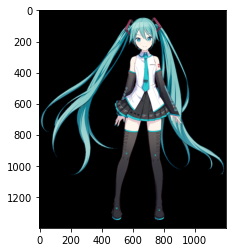

In [34]:
plt.imshow(inputImg)

# Lesson 8: Data preprocessing

before give an image to the Model, make sure to preprocess the image so it has the right characteristic like shape, mean, std deviation so that the network can produce meaningfull output.

Python code for the transformation with resize, centerCrop, toTensor, normalize

In [13]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

apply these transformation to the input image

In [35]:
inputImg_t = transform(inputImg)

In [36]:
print(inputImg_t.shape)

torch.Size([3, 224, 224])


now we will create the batch from this input image. we are adding one more dimension to it at dimesion 0 to convert it to a batch.

the batch that we get is the required size for ResNet and AlexNet to process ([1, 3, 224, 224]).

In [37]:
import torch
inputImg_bt = torch.unsqueeze(inputImg_t, 0)
print(inputImg_bt.shape)

torch.Size([1, 3, 224, 224])


# Lesson 9: Single label image classification using deep learning model

Adding a pretrained model to Colab

In [18]:
from torchvision import models
#dir(models) to show all the models from torchvision

Adding resnet model

resnet.eval() is to set resnet to evaluation mode so we can do the prediction

In [ ]:
resnet = models.resnet101(pretrained=True)
resnet.eval()

Adding AlexNet model

In [ ]:
alexnet = models.alexnet(pretrained=True)
alexnet.eval()

now use resnet to evaluate the image

In [43]:
output = resnet(inputImg_bt)

In [39]:
output = alexnet(inputImg_bt)

resnet will not return the name of the class instead, it will return the key value id to the name of the class. So we will use this id together with the dictionary of 1000 classes that we have to fetch out the name of the class.

In [44]:
with open ('/content/drive/My Drive/Udemy: Image classification/imageClass/2.1 imagenet1000Classes.txt') as classesfile:
  ImageNetclasses = [line.strip() for line in classesfile.readlines()]

find the predicted index where the maximum score of the output index occurs

In [45]:
_, predicted = torch.max(output, 1)
percentage = torch.softmax(output, dim=1)[0] * 100
print(ImageNetclasses[predicted[0]], percentage[predicted[0]].item())

451: 'bolo tie, bolo, bola tie, bola', 45.841064453125
